In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.metrics import mean_squared_error
import os

# RAW eQTL values and correlation

In [ ]:
dir='/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/GTEx_Analysis_v8_eQTL/'
data=pd.DataFrame()
for i in os.listdir(dir):
    if i.endswith('.v8.signif_variant_gene_pairs.txt.gz'):
        tissue=i.replace('.v8.signif_variant_gene_pairs.txt.gz','')
        tissue_data=pd.read_csv(dir+i,sep='\t',usecols=[0,1,6,7]).rename(columns={'pval_nominal':'pval_'+tissue,'slope':'slope_'+tissue})
        if data.empty: data=tissue_data
        else: data=data.merge(tissue_data,how='outer')
        print(tissue,'done')

Adipose_Subcutaneous done
Adipose_Visceral_Omentum done
Adrenal_Gland done
Artery_Aorta done
Artery_Coronary done
Artery_Tibial done
Brain_Amygdala done
Brain_Anterior_cingulate_cortex_BA24 done
Brain_Caudate_basal_ganglia done
Brain_Cerebellar_Hemisphere done
Brain_Cerebellum done
Brain_Cortex done
Brain_Frontal_Cortex_BA9 done
Brain_Hippocampus done
Brain_Hypothalamus done
Brain_Nucleus_accumbens_basal_ganglia done
Brain_Putamen_basal_ganglia done
Brain_Spinal_cord_cervical_c-1 done
Brain_Substantia_nigra done
Breast_Mammary_Tissue done
Cells_Cultured_fibroblasts done
Cells_EBV-transformed_lymphocytes done
Colon_Sigmoid done
Colon_Transverse done
Esophagus_Gastroesophageal_Junction done
Esophagus_Mucosa done
Esophagus_Muscularis done
Heart_Atrial_Appendage done
Heart_Left_Ventricle done
Kidney_Cortex done
Liver done
Lung done
Minor_Salivary_Gland done
Muscle_Skeletal done
Nerve_Tibial done
Ovary done
Pancreas done
Pituitary done
Prostate done
Skin_Not_Sun_Exposed_Suprapubic done
Skin

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def eqtl_heatmap(dataset):
    plt.figure(figsize=(15, 15))
    corr = dataset.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    return ax


In [6]:
corr=data.corr()

In [4]:
data[data.columns[2:]].corr()

,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
Adipose_Subcutaneous,1.000000,0.977658,0.952442,0.959762,0.970587,0.966000,0.930229,0.919513,0.918693,0.855933,...,0.952861,0.954381,0.955696,0.946990,0.961595,0.831977,0.948525,0.960328,0.960135,0.907036
Adipose_Visceral_Omentum,0.977658,1.000000,0.958465,0.962549,0.972438,0.961343,0.932967,0.924250,0.924402,0.859309,...,0.955024,0.950807,0.959192,0.951788,0.966012,0.847033,0.949496,0.962284,0.964460,0.921650
Adrenal_Gland,0.952442,0.958465,1.000000,0.955692,0.969525,0.945124,0.951825,0.949351,0.947314,0.868911,...,0.937713,0.932492,0.959990,0.957482,0.965215,0.866089,0.947420,0.966417,0.965744,0.897922
Artery_Aorta,0.959762,0.962549,0.955692,1.000000,0.981610,0.973845,0.941572,0.931681,0.928999,0.878559,...,0.940225,0.933870,0.954841,0.942887,0.960952,0.814668,0.943865,0.969303,0.964179,0.895710
Artery_Coronary,0.970587,0.972438,0.969525,0.981610,1.000000,0.976946,0.955762,0.951241,0.950145,0.897528,...,0.955269,0.950241,0.967197,0.960302,0.969643,0.859180,0.956401,0.976972,0.972122,0.916876
Artery_Tibial,0.966000,0.961343,0.945124,0.973845,0.976946,1.000000,0.931941,0.920088,0.920520,0.851998,...,0.939579,0.937283,0.950021,0.932147,0.956890,0.805809,0.941766,0.959105,0.955470,0.893732
Brain_Amygdala,0.930229,0.932967,0.951825,0.941572,0.955762,0.931941,1.000000,0.984558,0.982914,0.937766,...,0.924660,0.921818,0.948021,0.946662,0.940892,0.867553,0.930446,0.966290,0.961693,0.884196
Brain_Anterior_cingulate_cortex_BA24,0.919513,0.924250,0.949351,0.931681,0.951241,0.920088,0.984558,1.000000,0.980350,0.937826,...,0.907892,0.903380,0.941054,0.936157,0.932701,0.850991,0.926413,0.957655,0.957158,0.878868
Brain_Caudate_basal_ganglia,0.918693,0.924402,0.947314,0.928999,0.950145,0.920520,0.982914,0.980350,1.000000,0.932322,...,0.913909,0.911254,0.939168,0.933223,0.933916,0.855420,0.924565,0.955393,0.957468,0.875210
Brain_Cerebellar_Hemisphere,0.855933,0.859309,0.868911,0.878559,0.897528,0.851998,0.937766,0.937826,0.932322,1.000000,...,0.854224,0.849350,0.906028,0.902286,0.871105,0.791523,0.880378,0.913688,0.910517,0.804043


In [5]:
data[data.columns[2:]].corr().mean().mean()

0.9367482655986697

# pre-finemapped eQTL files merging

### CAVEMAN

In [2]:
caveman=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_CaVEMaN/GTEx_v8_finemapping_CaVEMaN.txt.gz'\
                   ,compression='gzip',sep='\t')

In [7]:
caveman.pivot_table(index=['eQTL','GENE'],columns='TISSUE',values='Probability')

,TISSUE,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
eQTL,GENE,,,,,,,,,,,,,,,,,,,,,
chr10_100007241_C_T,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,0.201558,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr10_100008640_A_G,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr10_100009635_T_G,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr10_100014923_C_T,ENSG00000119929.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr10_100017063_G_A,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_99899260_C_G,ENSG00000233680.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.231066,NaN,NaN,NaN,NaN,NaN
chrX_99953318_T_G,ENSG00000102362.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chrX_99959994_A_G,ENSG00000101811.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261396,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
caveman.pivot_table(index=['eQTL','GENE'],columns='TISSUE',values='Probability').corr().mean().mean()

0.6023502107621064

### CAVIAR

In [3]:
caviar=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_CAVIAR/CAVIAR_Results_v8_GTEx_LD_HighConfidentVariants.gz'\
                   ,compression='gzip',sep='\t')

In [10]:
caviar.pivot_table(index=['eQTL','GENE'],columns='TISSUE',values='Probability')

,TISSUE,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
eQTL,GENE,,,,,,,,,,,,,,,,,,,,,
10_100005358,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_100005711,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_100006780,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_100007241,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,0.247484,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_100008640,ENSG00000107554.16,0.153756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_99981165,ENSG00000119509.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9_99985659,ENSG00000136874.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9_99992144,ENSG00000136874.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
caviar.pivot_table(index=['eQTL','GENE'],columns='TISSUE',values='Probability').corr().mean().mean()

0.5783939939058803

### DAPG

In [12]:
data=pd.DataFrame(columns=['snp','gene_id','Tissue','value'])
count=0
for chunk in pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_DAPG/GTEx_v8_finemapping_DAPG.CS95.txt.gz'\
                   ,compression='gzip',sep="\t",header=None,names=['chr','pos','snp','R','A','Details'],chunksize=10000):
    data_loop=pd.DataFrame(columns=['snp','gene_id','Tissue','value'])
    chunk['gene_id']=chunk['Details'].str.split(':',expand=True)[0]
    details=chunk['Details'].str.split(r"[|:@=]", expand=True).add_prefix('D')
    merged=chunk.drop(columns='Details').join(details)
    i=0
    while i < (len(details.columns)-1):
        to_add=pd.DataFrame({'snp':merged['snp'],'gene_id':merged['D'+str(i)],'Tissue':merged['D'+str(i+2)],'value':merged['D'+str(i+3)]})
        to_add=to_add[to_add['value'].notna()]
        data_loop=data_loop.append(to_add)
        i=i+4
    data=data.append(data_loop)
    count=count+10000
    print(count,'data points processed.',end='\r')
data['value']=data['value'].astype('float')
data_pivot=data.pivot_table(index=['snp','gene_id'],columns='Tissue',values='value')

In [15]:
data_pivot.to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_DAPG/DAPG_melted.csv.gz',compression='gzip',index=True)

In [2]:
data_pivot=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_DAPG/DAPG_melted.csv.gz',compression='gzip')

In [3]:
data_pivot

,snp,gene_id,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,...,Skin_Not_Sun_Exposed,Skin_Sun_Exposed,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,chr10_100000235_C_T_b38,ENSG00000107554.16,NaN,NaN,NaN,NaN,0.02282,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.005087,NaN,NaN,NaN,NaN,NaN
1,chr10_100002012_T_C_b38,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr10_100002628_A_C_b38,ENSG00000107554.16,NaN,NaN,0.034510,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.004835,0.008138,NaN,NaN,NaN,NaN
3,chr10_100002875_A_G_b38,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr10_100004376_T_C_b38,ENSG00000107554.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374613,chr9_99996889_GTGTATGTGTATATATATACATATATATATAT...,ENSG00000136874.10,NaN,NaN,0.001059,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374614,chr9_99997250_C_T_b38,ENSG00000136874.10,0.05253,0.08052,0.087030,NaN,NaN,0.02219,NaN,NaN,...,0.04135,0.004034,0.03319,0.01027,0.041000,0.023040,0.04505,NaN,NaN,NaN
2374615,chr9_99997408_T_TTTTC_b38,ENSG00000136874.10,0.07117,0.01961,0.025900,NaN,NaN,0.02377,NaN,NaN,...,0.04522,0.017450,0.03319,0.01027,0.041000,0.023040,0.03887,NaN,NaN,NaN
2374616,chr9_99998283_G_C_b38,ENSG00000136874.10,0.04028,0.01501,0.025900,NaN,NaN,0.02377,NaN,NaN,...,0.02609,0.015580,0.03319,0.01027,0.035890,0.053100,0.05160,NaN,NaN,NaN


In [7]:
data_pivot[['snp','gene_id','Cells_EBV-transformed_lymphocytes']].dropna().to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/DAPG_GTEX_z.csv',index=False)

In [57]:
data_pivot.corr().mean().mean()

0.7392859757811484

## Preparing data for merging pre-finemapped datasets

In [16]:
dapg=data

In [17]:
dapg['snp']=dapg['snp'].str.rstrip('_b38')

In [18]:
dapg['gene_id']=dapg['gene_id'].str.split('.',expand=True)[0]

In [19]:
dapg['snp']=dapg['snp'].str.split('_',expand=True)[0]+'_'+dapg['snp'].str.split('_',expand=True)[1]

In [20]:
dapg=dapg.rename(columns={'snp':'eQTL','gene_id':'GENE','value':'DAPG_value'})

In [33]:
dapg

NameError: name 'dapg' is not defined

In [22]:
caveman['GENE']=caveman['GENE'].str.split('.',expand=True)[0]

In [23]:
caveman['eQTL']=caveman['CHROM'].astype(str)+'_'+caveman['POS'].astype(str)

In [24]:
caveman=caveman.rename(columns={'TISSUE':'Tissue','Probability':'CAVEMAN_value'})[['eQTL','GENE','Tissue','CAVEMAN_value']]

In [25]:
caveman

,eQTL,GENE,Tissue,CAVEMAN_value
0,chrX_100649875,ENSG00000000003,Adipose_Subcutaneous,0.986724
1,chr1_169699715,ENSG00000000457,Adipose_Subcutaneous,0.174525
2,chr1_169891332,ENSG00000000457,Adipose_Subcutaneous,0.266151
3,chr1_169829604,ENSG00000000460,Adipose_Subcutaneous,0.176874
4,chr1_27634281,ENSG00000000938,Adipose_Subcutaneous,0.226577
...,...,...,...,...
1314538,chr2_143097724,ENSG00000284167,Whole_Blood,0.264387
1314539,chr17_76585863,ENSG00000284526,Whole_Blood,0.231189
1314540,chr17_76585864,ENSG00000284526,Whole_Blood,0.231189
1314541,chr17_76585943,ENSG00000284526,Whole_Blood,0.231189


In [26]:
caviar['GENE']=caviar['GENE'].str.split('.',expand=True)[0]

In [27]:
caviar['eQTL']='chr'+caviar['eQTL'].astype(str)

In [28]:
caviar=caviar.rename(columns={'TISSUE':'Tissue','Probability':'CAVIAR_value'})[['eQTL','GENE','Tissue','CAVIAR_value']]

In [29]:
caviar

,eQTL,GENE,Tissue,CAVIAR_value
0,chr1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456
1,chr1_161687648,ENSG00000248485,Brain_Caudate_basal_ganglia,0.211998
2,chr1_161319639,ENSG00000248485,Brain_Caudate_basal_ganglia,0.119975
3,chr1_212904839,ENSG00000162769,Brain_Caudate_basal_ganglia,0.999549
4,chr1_202927014,ENSG00000117153,Brain_Caudate_basal_ganglia,0.539906
...,...,...,...,...
1257152,chr22_50256841,ENSG00000188130,Brain_Amygdala,0.116382
1257153,chr22_50255125,ENSG00000188130,Brain_Amygdala,0.130436
1257154,chr22_50760853,ENSG00000100239,Brain_Amygdala,0.375884
1257155,chr22_50752450,ENSG00000100239,Brain_Amygdala,0.331156


## Merging data

In [30]:
merged_data=caviar.merge(dapg,on=['eQTL','GENE','Tissue'],how='outer').merge(caveman,on=['eQTL','GENE','Tissue'],how='outer')

In [31]:
merged_data

,eQTL,GENE,Tissue,CAVIAR_value,DAPG_value,CAVEMAN_value
0,chr1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,NaN,0.201923
1,chr1_161687648,ENSG00000248485,Brain_Caudate_basal_ganglia,0.211998,NaN,NaN
2,chr1_161319639,ENSG00000248485,Brain_Caudate_basal_ganglia,0.119975,NaN,NaN
3,chr1_212904839,ENSG00000162769,Brain_Caudate_basal_ganglia,0.999549,0.9977,0.362678
4,chr1_202927014,ENSG00000117153,Brain_Caudate_basal_ganglia,0.539906,NaN,0.278193
...,...,...,...,...,...,...
8702367,chr22_24652045,ENSG00000284128,Whole_Blood,NaN,NaN,0.276968
8702368,chr1_42964678,ENSG00000284138,Whole_Blood,NaN,NaN,0.232462
8702369,chr1_42965857,ENSG00000284138,Whole_Blood,NaN,NaN,0.232462
8702370,chr1_43655680,ENSG00000284138,Whole_Blood,NaN,NaN,0.169572


In [32]:
merged_data[merged_data.columns[-3:]].corr()

,CAVIAR_value,DAPG_value,CAVEMAN_value
CAVIAR_value,1.000000,0.679534,0.720486
DAPG_value,0.679534,1.000000,0.733230
CAVEMAN_value,0.720486,0.733230,1.000000


In [33]:
### Mean eQTL value for each dataset, DAPG has a lot more eQTL of lower score
merged_data[merged_data.columns[-3:]].mean()

CAVIAR_value     0.276636
DAPG_value       0.054331
CAVEMAN_value    0.266743
dtype: float64

In [34]:
### subset = data present in the three eQTL sources
subset=merged_data[~ merged_data[merged_data.columns[-3:]].isna().any(axis=1)]

In [35]:
len(subset)

292827

In [36]:
### Mean eQTL value for each dataset in the subset, scores are much similar
subset[subset.columns[-3:]].mean()

CAVIAR_value     0.378356
DAPG_value       0.387927
CAVEMAN_value    0.424970
dtype: float64

In [37]:
subset[subset.columns[-3:]].corr()

,CAVIAR_value,DAPG_value,CAVEMAN_value
CAVIAR_value,1.000000,0.749752,0.749315
DAPG_value,0.749752,1.000000,0.657305
CAVEMAN_value,0.749315,0.657305,1.000000


In [38]:
subset[subset[subset.columns[-3:]] > 0.7].corr()

,CAVIAR_value,DAPG_value,CAVEMAN_value
CAVIAR_value,1.000000,0.452277,0.329236
DAPG_value,0.452277,1.000000,0.296794
CAVEMAN_value,0.329236,0.296794,1.000000


In [47]:
merged_data['M-Probability']=merged_data[merged_data.columns[-3:]].mean(axis=1)

In [50]:
merged_data.drop(columns=merged_data.columns[-4:-1]).to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/Mean_probability.csv',index=False)

In [61]:
merged_data.groupby(by=['GENE','eQTL']).mean().round(decimals=2)

In [65]:
rounded_data

CAVIAR_value  DAPG_value  CAVEMAN_value  \
GENE            eQTL                                                      
ENSG00000000003 chrX_100624362           NaN         NaN           0.18   
                chrX_100649361           NaN         NaN           0.28   
                chrX_100649875           NaN         NaN           0.83   
                chrX_100651652           NaN         NaN           0.28   
                chrX_100659298           NaN         NaN           0.20   
...                                      ...         ...            ...   
ENSG00000284600 chr2_2004502            0.15         NaN            NaN   
                chr2_2313842            0.17         NaN            NaN   
                chr2_2622621            0.11         NaN            NaN   
                chr2_2624166            0.11         NaN            NaN   
                chr2_965591             0.19         NaN            NaN   

                                M-Probability  
GENE            eQTL                           
ENSG00000000003 chrX_100624362           0.18  
                chrX_100649361           0.28  
                chrX_100649875           0.83  
                chrX_100651652           0.28  
                chrX_100659298           0.20  
...                                       ...  
ENSG00000284600 chr2_2004502             0.15  
                chr2_2313842             0.17  
                chr2_2622621             0.11  
                chr2_2624166             0.11  
                chr2_965591              0.19  

[2950731 rows x 4 columns]

# Data correlation with features

### HiC loops

In [4]:
import pybedtools
import pyensembl

In [5]:
hic_loops=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/HiC/loops/Rao_2014.GM12878.hg38.peakachu-merged.loops', sep='\t',header=None,names=['chr','start','x2','y1','end','end2'])#[['chr','start','end']]

In [6]:
hic_loops['start']=hic_loops.min(axis=1)

In [7]:
hic_loops['end']=hic_loops.max(axis=1)

In [8]:
hic_loops['chr']=hic_loops['chr'].str.lstrip('chr')

In [9]:
hic_loops['loop-n']=pd.Series(hic_loops.index.tolist())
hic_loops['loop-n']='loop_'+hic_loops['loop-n'].astype(str)

In [10]:
hic_loops=hic_loops[['chr','start','end','loop-n']]

In [11]:
hic_loops

,chr,start,end,loop-n
0,1,153507524,153757524,loop_0
1,1,153507524,153987524,loop_1
2,1,184070866,184670866,loop_2
3,1,184070866,184230866,loop_3
4,1,204560872,204770872,loop_4
...,...,...,...,...
17219,22,26084034,26344034,loop_17219
17220,22,17787234,18077234,loop_17220
17221,22,42623994,43043994,loop_17221
17222,22,22807510,23287813,loop_17222


In [12]:
hic_loops_bed=pybedtools.BedTool.from_dataframe(hic_loops)

### Caviar and Caveman z-scores

In [13]:
caviar_bed=pybedtools.BedTool.from_dataframe(caviar[['CHROM','POS','POS','GENE','eQTL','Probability','TISSUE']])

In [14]:
caviar['GENE']=caviar['GENE'].str.split('.',expand=True)[0]

In [15]:
caveman['GENE']=caveman['GENE'].str.split('.',expand=True)[0]

In [16]:
caveman['CHROM']=caveman['CHROM'].str.lstrip('chr')

### Gene list and details

In [17]:
ensembl = pyensembl.EnsemblRelease(release=88)

In [18]:
gene_list=set(list(caveman['GENE'])+list(caviar['GENE']))

In [19]:
gene_db=pd.DataFrame()
for i in gene_list:
    gene=''
    gene=ensembl.gene_by_id(i).to_dict()
    gene_db=gene_db.append(pd.DataFrame.from_dict([gene]))

In [20]:
gene_details=gene_db.drop(columns=['strand','biotype','genome'])

In [21]:
caviar_genes=caviar.merge(gene_details,left_on='GENE',right_on='gene_id')

In [22]:
caveman_genes=caveman.merge(gene_details,left_on='GENE',right_on='gene_id')

In [23]:
caviar_genes_bed=pybedtools.BedTool.from_dataframe(caviar_genes[['CHROM','start','end','eQTL','GENE','TISSUE','Probability']])

In [24]:
caviar_var_bed=pybedtools.BedTool.from_dataframe(caviar_genes[['CHROM','POS','POS','eQTL','GENE','TISSUE','Probability']])

In [25]:
caveman_genes_bed=pybedtools.BedTool.from_dataframe(caveman_genes[['CHROM','start','end','eQTL','GENE','TISSUE','Probability']])

In [26]:
caveman_var_bed=pybedtools.BedTool.from_dataframe(caveman_genes[['CHROM','POS','POS','eQTL','GENE','TISSUE','Probability']])

In [27]:
names='chr start end eQTL gene_id Tissue Probability loop_chr loop_start loop_end loop_n'.split()

In [28]:
drop='loop_chr loop_start loop_end'.split()

In [29]:
caviar_genes_loops=caviar_genes_bed.intersect(hic_loops_bed,wa=True,wb=True,loj=True).to_dataframe(names=names,index_col=False).drop(columns=drop)

/homes/jhidalgo/.local/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [30]:
caviar_var_loops=caviar_var_bed.intersect(hic_loops_bed,wa=True,wb=True,loj=True).to_dataframe(names=names,index_col=False).drop(columns=drop)

/homes/jhidalgo/.local/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [31]:
caviar_loops=caviar_genes_loops.merge(caviar_var_loops,on=['eQTL','gene_id','Tissue','Probability'])

In [32]:
caviar_loops['same_loop']=caviar_loops['loop_n_x']==caviar_loops['loop_n_y']

In [33]:
caviar_loops

,chr_x,start_x,end_x,eQTL,gene_id,Tissue,Probability,loop_n_x,chr_y,start_y,end_y,loop_n_y,same_loop
0,1,161258727,161285450,1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,loop_536,1,161274374,161274374,loop_536,True
1,1,161258727,161285450,1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,loop_536,1,161274374,161274374,loop_1121,False
2,1,161258727,161285450,1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,loop_536,1,161274374,161274374,loop_14224,False
3,1,161258727,161285450,1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,loop_536,1,161274374,161274374,loop_537,False
4,1,161258727,161285450,1_161274374,ENSG00000248485,Brain_Caudate_basal_ganglia,0.157456,loop_1121,1,161274374,161274374,loop_536,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504926,20,5302040,5314369,20_5580364,ENSG00000101292,Brain_Amygdala,0.707708,loop_7426,20,5580364,5580364,loop_14088,False
13504927,20,24199767,24224588,20_23489774,ENSG00000230133,Brain_Amygdala,0.505586,.,20,23489774,23489774,loop_7201,False
13504928,20,24199767,24224588,20_23489774,ENSG00000230133,Brain_Amygdala,0.505586,.,20,23489774,23489774,loop_7528,False
13504929,20,24199767,24224588,20_23401416,ENSG00000230133,Brain_Amygdala,0.152978,.,20,23401416,23401416,loop_7528,False


### Memory cleaning

In [34]:
del [caveman_genes,caveman_genes_bed,caveman_var_bed,caviar_bed,caviar_genes,caviar_genes_bed,caviar_genes_loops]

In [35]:
caviar_loops.to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/Caviar_loops.csv',index=False)

## Visualization

In [37]:
from plotnine import *

In [38]:
target='Cells_EBV-transformed_lymphocytes'

In [39]:
plotdata=caviar_loops[caviar_loops['Tissue']==target]

In [42]:
plotdata

,chr_x,start_x,end_x,eQTL,gene_id,Tissue,Probability,loop_n_x,chr_y,start_y,end_y,loop_n_y,same_loop
2619,1,202891100,202928636,1_202927014,ENSG00000117153,Cells_EBV-transformed_lymphocytes,0.904265,loop_217,1,202927014,202927014,loop_217,True
2620,1,202891100,202928636,1_202927014,ENSG00000117153,Cells_EBV-transformed_lymphocytes,0.904265,loop_217,1,202927014,202927014,loop_1001,False
2621,1,202891100,202928636,1_202927014,ENSG00000117153,Cells_EBV-transformed_lymphocytes,0.904265,loop_217,1,202927014,202927014,loop_1224,False
2622,1,202891100,202928636,1_202927014,ENSG00000117153,Cells_EBV-transformed_lymphocytes,0.904265,loop_1001,1,202927014,202927014,loop_217,False
2623,1,202891100,202928636,1_202927014,ENSG00000117153,Cells_EBV-transformed_lymphocytes,0.904265,loop_1001,1,202927014,202927014,loop_1001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467568,22,25437306,25437823,22_26217096,ENSG00000271138,Cells_EBV-transformed_lymphocytes,0.121121,loop_7934,22,26217096,26217096,loop_17219,False
13467569,22,25437306,25437823,22_26217096,ENSG00000271138,Cells_EBV-transformed_lymphocytes,0.121121,loop_17207,22,26217096,26217096,loop_7717,False
13467570,22,25437306,25437823,22_26217096,ENSG00000271138,Cells_EBV-transformed_lymphocytes,0.121121,loop_17207,22,26217096,26217096,loop_7768,False
13467571,22,25437306,25437823,22_26217096,ENSG00000271138,Cells_EBV-transformed_lymphocytes,0.121121,loop_17207,22,26217096,26217096,loop_7933,False


In [56]:
truedata=plotdata[plotdata['same_loop']==True][['eQTL','gene_id']].drop_duplicates()

In [65]:
pre_falsedata=plotdata[plotdata['same_loop']==False][['eQTL','gene_id']].drop_duplicates()

In [66]:
falsedata=truedata.merge(pre_falsedata,how='outer',indicator=True)[truedata.merge(pre_falsedata,how='outer',indicator=True)['_merge']=='right_only'].drop(columns='_merge')

In [82]:
trueplot=plotdata[plotdata['same_loop']==True].merge(truedata)

In [83]:
falseplot=plotdata[plotdata['same_loop']==False].merge(falsedata)

In [85]:
pd.concat([trueplot,falseplot]).groupby(['eQTL','gene_id']).mean()

,,chr_x,start_x,end_x,Probability,chr_y,start_y,end_y,same_loop
eQTL,gene_id,,,,,,,,
10_100345873,ENSG00000119929,10,99702558,99756134,0.406717,10,100345873,100345873,False
10_100499811,ENSG00000075826,10,100486642,100519864,0.125705,10,100499811,100499811,True
10_100505426,ENSG00000075826,10,100486642,100519864,0.195236,10,100505426,100505426,True
10_100506058,ENSG00000075826,10,100486642,100519864,0.195236,10,100506058,100506058,True
10_100509449,ENSG00000075826,10,100486642,100519864,0.195236,10,100509449,100509449,True
...,...,...,...,...,...,...,...,...,...
9_98356894,ENSG00000106785,9,98069275,98119212,0.116264,9,98356894,98356894,True
9_99060020,ENSG00000204291,9,98943179,99070792,0.184917,9,99060020,99060020,True
9_99060118,ENSG00000204291,9,98943179,99070792,0.184846,9,99060118,99060118,True


In [44]:
grouped=plotdata.groupby(['eQTL','gene_id'])

In [47]:
test=grouped.apply(lambda g: g[g['same_loop'] == g['same_loop'].max()])

In [49]:
test.drop_duplicates()

chr_x   start_x     end_x  \
eQTL         gene_id                                               
10_100345873 ENSG00000119929 13109813     10  99702558  99756134   
                             13109814     10  99702558  99756134   
                             13109815     10  99702558  99756134   
                             13109816     10  99702558  99756134   
                             13109817     10  99702558  99756134   
...                                      ...       ...       ...   
9_99289411   ENSG00000222337 13465147      9  99284022  99284373   
                             13465154      9  99284022  99284373   
                             13465161      9  99284022  99284373   
                             13465168      9  99284022  99284373   
                             13465175      9  99284022  99284373   

                                               eQTL          gene_id  \
eQTL         gene_id                                                   
10_100345873 ENSG00000119929 13109813  10_100345873  ENSG00000119929   
                             13109814  10_100345873  ENSG00000119929   
                             13109815  10_100345873  ENSG00000119929   
                             13109816  10_100345873  ENSG00000119929   
                             13109817  10_100345873  ENSG00000119929   
...                                             ...              ...   
9_99289411   ENSG00000222337 13465147    9_99289411  ENSG00000222337   
                             13465154    9_99289411  ENSG00000222337   
                             13465161    9_99289411  ENSG00000222337   
                             13465168    9_99289411  ENSG00000222337   
                             13465175    9_99289411  ENSG00000222337   

                                                                  Tissue  \
eQTL         gene_id                                                       
10_100345873 ENSG00000119929 13109813  Cells_EBV-transformed_lymphocytes   
                             13109814  Cells_EBV-transformed_lymphocytes   
                             13109815  Cells_EBV-transformed_lymphocytes   
                             13109816  Cells_EBV-transformed_lymphocytes   
                             13109817  Cells_EBV-transformed_lymphocytes   
...                                                                  ...   
9_99289411   ENSG00000222337 13465147  Cells_EBV-transformed_lymphocytes   
                             13465154  Cells_EBV-transformed_lymphocytes   
                             13465161  Cells_EBV-transformed_lymphocytes   
                             13465168  Cells_EBV-transformed_lymphocytes   
                             13465175  Cells_EBV-transformed_lymphocytes   

                                       Probability    loop_n_x  chr_y  \
eQTL         gene_id                                                    
10_100345873 ENSG00000119929 13109813     0.406717  loop_16397     10   
                             13109814     0.406717  loop_16397     10   
                             13109815     0.406717   loop_1446     10   
                             13109816     0.406717   loop_1446     10   
                             13109817     0.406717   loop_1657     10   
...                                            ...         ...    ...   
9_99289411   ENSG00000222337 13465147     0.183283  loop_12707      9   
                             13465154     0.183283  loop_12708      9   
                             13465161     0.183283  loop_12709      9   
                             13465168     0.183283  loop_12870      9   
                             13465175     0.183283  loop_12905      9   

                                         start_y      end_y    loop_n_y  \
eQTL         gene_id                                                      
10_100345873 ENSG00000119929 13109813  100345873  100345873   loop_1531   
                             13109814  100345873  100

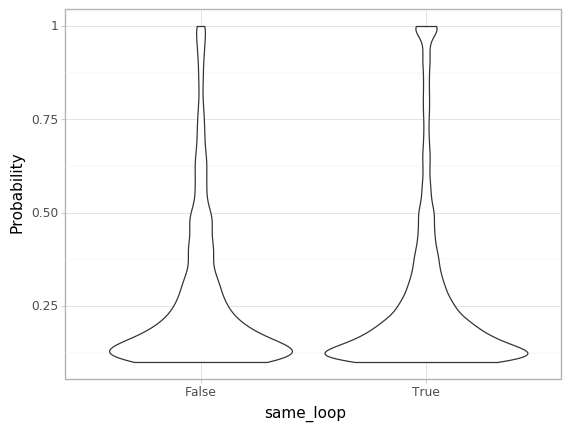

<ggplot: (2933534832216)>

In [86]:
x='same_loop'
y='Probability'
(
    ggplot(pd.concat([trueplot,falseplot]).groupby(['eQTL','gene_id']).mean(),aes(x=x,y=y))
    +geom_violin()
    +theme_light()
)

In [87]:
data=pd.concat([trueplot,falseplot]).groupby(['eQTL','gene_id']).mean()

In [89]:
data=data[data['Probability']>0.75]

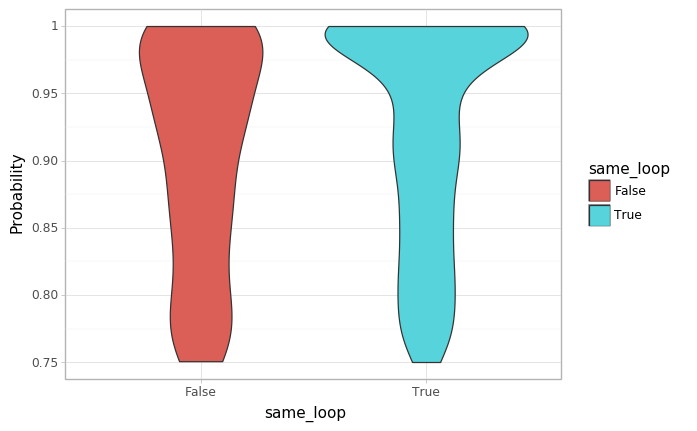

<ggplot: (2933501881004)>

In [93]:
x='same_loop'
y='Probability'
(
    ggplot(data,aes(x=x,y=y,fill=x))
    +geom_violin()
    +theme_light()
)